In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree, metrics
from sklearn.tree import export_graphviz
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from os import system as sys

In [2]:
fuji = pd.read_csv("fuji_full_fp_sample.csv")
fuji = fuji.sample(frac=1).reset_index(drop=True)
fuji

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,circ_radius,pos_angle,tmass,flag,z_2,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy
0,134.020514,81.772358,39633559480173375,1347,8140,sv1,bright,39633559480173375,0.124471,0.000009,...,4.018244,-33.471046,2MASXJ08560498+8146209,0,0.1245,15.467,1.047,1.831,0.151,0.389
1,134.623597,1.035963,39627811144600333,1246,4098,sv1,bright,39627811144600333,0.072361,0.000023,...,4.783089,-84.540500,2MASXJ08582964+0102094,1,0.0724,15.768,0.674,-9.999,-9.999,0.460
2,195.504334,27.652957,39628433277325829,3176,10379,sv3,bright,39628433277325829,0.023683,0.000015,...,4.697832,28.052300,2MASXJ13020106+2739109,1,0.0237,15.061,0.650,1.046,0.529,0.202
3,267.752201,65.188168,39633446317854064,3481,10239,sv3,bright,39633446317854064,0.037370,0.000004,...,6.300570,-80.987564,2MASXJ17510046+6511174,0,0.0374,14.518,0.592,3.250,0.030,0.201
4,213.673381,0.192687,39627794350608431,3204,26048,sv3,bright,39627794350608431,0.123680,0.000035,...,0.744052,-45.216217,2MASSJ14144159+0011336,1,0.1237,17.673,0.753,2.037,-9.999,0.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,175.740140,55.361013,39633325303792494,2648,5979,sv2,bright,39633325303792494,0.051720,0.000011,...,0.978437,-67.162030,2MASSJ11425763+5521397,1,0.0517,16.561,0.748,1.290,-9.999,0.040
6694,183.542563,1.276898,39627818006479809,3463,26285,sv3,bright,39627818006479809,0.075111,0.000011,...,2.992783,-44.308353,2MASXJ12141023+0116365,1,0.0751,16.477,0.812,1.579,0.471,0.065
6695,181.890007,54.693355,39633318404163076,2682,11179,sv2,bright,39633318404163076,0.081916,0.000022,...,3.776596,24.936028,2MASXJ12073364+5441363,0,0.0819,15.256,0.637,2.746,0.061,0.194
6696,172.926862,49.878468,39633247985994267,2619,5613,sv2,bright,39633247985994267,0.068790,0.000011,...,2.027929,1.248259,2MASXJ11314243+4952424,1,0.0688,16.413,0.656,1.818,-9.999,0.066


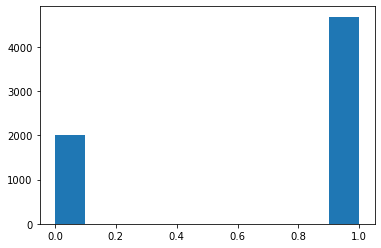

In [3]:
plt.hist(fuji.flag)
plt.show()

In [4]:
# flag_mapping = {0:"Spirals",1:"Ellipticals"}
# fuji.loc[:,"flag"] = fuji.flag.map(flag_mapping)
# fuji

In [5]:
print (len(fuji))

6698


In [6]:
fuji_train = fuji.head(4000)
fuji_test = fuji.tail(2698)

In [7]:
fuji.keys()

Index(['ra_1', 'dec_1', 'targetid_1', 'id', 'healpix', 'survey', 'program',
       'targetid.1', 'z_1', 'zerr', 'zwarn', 'spectype', 'subtype',
       'deltachi2', 'healpix_id', 'obsconditions', 'release', 'brickid_1',
       'brick_objid', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR',
       'snr_ppxf', 'TYPE', 'SERSIC_2', 'Z_PHOT_MEDIAN', 'Z_PHOT_L95', 'mag_g',
       'mag_r', 'mag_z', 'mag_B', 'mag_g_err', 'mag_r_err', 'mag_z_err',
       'fibre_mag_g', 'fibre_mag_r', 'fibre_mag_z', 'uncor_radius',
       'uncor_radius_err', 'BA_ratio', 'BA_ratio_error', 'circ_radius',
       'pos_angle', 'tmass', 'flag', 'z_2', 'rmag', 'g_r_PS1_5_cor', 'W2_W3',
       'W2_W3_err', 'PS1_ibumpy'],
      dtype='object')

In [8]:
cols = ['sersic_1','mag_g','mag_r','mag_z','uncor_radius','BA_ratio','pos_angle','g_r_PS1_5_cor','W2_W3']
cols

['sersic_1',
 'mag_g',
 'mag_r',
 'mag_z',
 'uncor_radius',
 'BA_ratio',
 'pos_angle',
 'g_r_PS1_5_cor',
 'W2_W3']

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [10]:
clf.fit(fuji_train[cols],fuji_train.flag)

DecisionTreeClassifier(max_depth=5)

In [11]:
train_predictions = clf.predict(fuji_train[cols])

In [12]:
test_predictions = clf.predict(fuji_test[cols])

In [13]:
train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
train_accuracy

0.87125

In [14]:
test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
test_accuracy

0.8380281690140845

In [15]:
train_accuracies = []; test_accuracies= []; depth = []
for i in range(24):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(fuji_train[cols],fuji_train.flag)
    train_predictions = clf.predict(fuji_train[cols])
    test_predictions = clf.predict(fuji_test[cols])
    train_accuracy = metrics.accuracy_score(fuji_train.flag, train_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracy = metrics.accuracy_score(fuji_test.flag, test_predictions)
    test_accuracies.append(test_accuracy)
    depth.append(i+1)

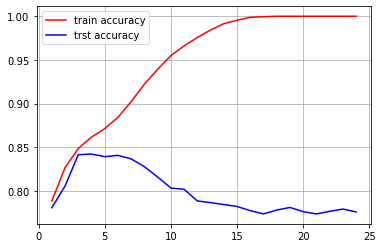

In [16]:
plt.plot(depth,train_accuracies, color="red",label="train accuracy")
plt.plot(depth,test_accuracies, color="blue",label="trst accuracy")
plt.grid()
plt.legend()
plt.show()

In [17]:
fuji_train["flag"].values

array([0, 1, 1, ..., 1, 1, 1])

In [18]:
#to do that all what you need is to uncomment cell #3 which change 0 to spirals and 1 to ellipticals
# export_graphviz(
#             clf,
#             out_file="fuji_tree.dot",
#             feature_names=cols,
#             class_names=fuji_train.flag,
#             rounded=True,
#             filled=True
#         )
# sys("dot -Tpng fuji_tree.dot -o fuji_tree.png")

In [19]:
metrics.f1_score(fuji_test.flag, test_predictions)

0.8365306673871927

In [20]:
metrics.precision_score(fuji_test.flag, test_predictions, average="macro")

0.7367608929401706

In [21]:
metrics.precision_score(fuji_test.flag, test_predictions, average="micro")

0.7757598220904374

In [22]:
metrics.precision_score(fuji_test.flag, test_predictions, average="weighted")

0.7792534761601488

In [23]:
metrics.roc_auc_score(fuji_test.flag, test_predictions)

0.7433646861612964

In [24]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [25]:
print ("test sample length = ",len(fuji_test) )
print ("true positive = ", true_positive(fuji_test.flag, test_predictions))
print ("true negative = ", true_negative(fuji_test.flag, test_predictions))
print ("false positive (Type-I error) = ", false_positive(fuji_test.flag, test_predictions))
print ("false negative (Type-II error) = ", false_negative(fuji_test.flag, test_predictions))

test sample length =  2698
true positive =  1548
true negative =  545
false positive (Type-I error) =  281
false negative (Type-II error) =  324


In [41]:
cm = metrics.confusion_matrix(fuji_test.flag, test_predictions)
cm = cm.T
print (cm)

[[ 545  324]
 [ 281 1548]]


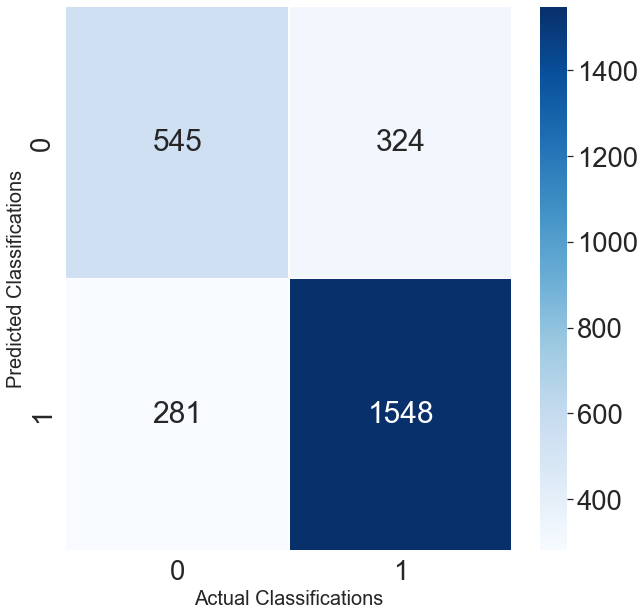

In [45]:
plt.figure(figsize=(10,10))
#cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap="Blues", cbar=True, fmt="d",linewidths=.5)
#sns.heatmap(cm, annot=True, cmap="hot", cbar=False)
plt.xlabel('Actual Classifications', fontsize=20)
plt.ylabel('Predicted Classifications', fontsize=20)
plt.show()